# Exploratory Data Analysis - IPL                                    


                                                Author:- Taranjeet Singh


# I have divided this Analysis into 4 categories :-


1) Analysis of IPL Teams

2) Analysis of IPL Players

3) Analysis of IPL Matches

4) Conclusion





### Importing necessary modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
print("Modules are imported")

Modules are imported


In [2]:
matches=pd.read_csv('matches.csv')

In [4]:
matches.head(2).T

,0,1
id,1,2
season,2017,2017
city,Hyderabad,Pune
date,2017-04-05,2017-04-06
team1,Sunrisers Hyderabad,Mumbai Indians
team2,Royal Challengers Bangalore,Rising Pune Supergiant
toss_winner,Royal Challengers Bangalore,Rising Pune Supergiant
toss_decision,field,field
result,normal,normal
dl_applied,0,0


In [5]:
deliveres=pd.read_csv('deliveries.csv')

# Let's start the Data-Preprocessing on matches.csv

In [6]:
matches.shape
# The matches.csv has 756 IPL Matches Data with 18 columns.

(756, 15)

Let's see The columns name too know more about data

In [7]:
matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue'],
      dtype='object')

In [8]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
dtypes: int64(5), object(10)
memory usage: 88.7+ KB


In [9]:
len(matches['season'].unique())

12

In [10]:
matches.isnull().sum()

id                 0
season             0
city               7
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
venue              0
dtype: int64

7 Missing values in City Columns, And 4 each in "player_of_match","winner" Column

Now let's deal with Missing Values:

In [11]:
matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue'],
      dtype='object')

In [42]:
matches[matches.city.isnull()][['city','date']]

,city,date


As these Dates belongs to the Matches where the City columns values are Missing and we see. That all these matches belongs
to the 2014 Season. So we can use these dates and season year(2014) To find out the city of the match. On Web Search i found
that all the matches with Missing City was played at Dubai International Stadium.


So, now we can fill this Missing values with the "Dubai" City

In [13]:
matches['city'] = matches['city'].fillna("Dubai")

In [14]:
matches[matches.winner.isnull()][['result','winner','player_of_match']]

,result,winner,player_of_match
300,no result,NaN,NaN
545,no result,NaN,NaN
570,no result,NaN,NaN
744,no result,NaN,NaN


We can see that the Missing values of 'winner' & 'player_of_match' column corresponds to result column where there is 
no result of the match. So, we don't need to remove this.

These null values are justified

# Let's start Datapreprocessing on deliveries.csv

In [15]:
deliveres.head(2).T

,0,1
match_id,1,1
inning,1,1
batting_team,Sunrisers Hyderabad,Sunrisers Hyderabad
bowling_team,Royal Challengers Bangalore,Royal Challengers Bangalore
over,1,1
ball,1,2
batsman,DA Warner,DA Warner
non_striker,S Dhawan,S Dhawan
bowler,TS Mills,TS Mills
is_super_over,0,0


In [16]:
deliveres.shape

(179078, 21)

In [17]:
deliveres.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [18]:
deliveres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

Here the last three columns contains lots and lots of Missing values. which is justified also because on every delivere a player can't be dismissed. when the player remains notout in every single dilevery that tends to be a missing value in the player_dismissed.

Now,the same sort of thing happens with the dismisal_kind cause if batsman remains notout on every single delivere there will be no kind of type of wicket. That determines how the batsman was dismissed.

Now,the same things stand for fielder. A fielder may not be involved in each dismissal so that columns contains missing values due to that.A batsman can also be dismissed due to (hitwicket and bowled).

# Now we our ready to go for Category Wise Analysis.
                            1) Analysis Of IPL Teams

In [19]:
teams = matches['winner'].value_counts()
teams

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

Now before moving further I saw there's a team Rising Pune Super Giant which is repeated twice maybe due to some error or something else. So let's fix this.

In [20]:
matches['winner'].replace(to_replace= "Rising Pune Supergiant",value="Rising Pune Supergiants",inplace=True)

In [21]:
teams=matches['winner'].value_counts()
teams

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Rising Pune Supergiants         15
Gujarat Lions                   13
Pune Warriors                   12
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Name: winner, dtype: int64

Let's see how many teams were a part of IPL

In [22]:
len(teams)

14

                                                **********

# 1) Analysis of IPL Teams


 #### Teams with Most Number of wins

In [23]:
teams=matches['winner'].value_counts()
teams

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Rising Pune Supergiants         15
Gujarat Lions                   13
Pune Warriors                   12
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Name: winner, dtype: int64

<AxesSubplot:title={'center':'Teams With Total No. Of Matches Won'}, ylabel='No. Of Matches Won'>

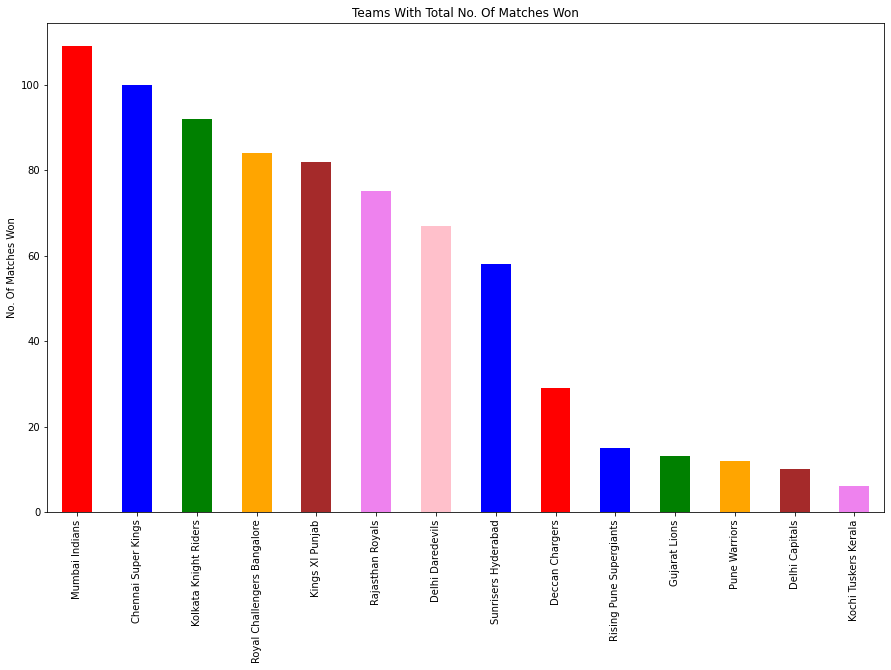

In [24]:
plt.figure(figsize=[15,9])
plt.title('Teams With Total No. Of Matches Won')
plt.ylabel('No. Of Matches Won')
matches.winner.value_counts().plot(kind='bar', color=['red','blue','green','orange','brown','violet','pink','blue'])


In [25]:
matches['win_by_runs'].max()

146

In [26]:
matches['win_by_wickets'].max()

10

# Teams with Season-wise Winner

In [27]:
winners=matches[['season', 'winner']]

In [28]:
team_with_the_most_title = {}
for i in sorted(winners.season.unique()):
    team_with_the_most_title[i] = winners[winners.season ==i]['winner'].tail(1).values[0]

season_winner = pd.Series(team_with_the_most_title)
season_winner = pd.DataFrame(season_winner, columns=["Season_Winner"])

In [29]:
season_winner

,Season_Winner
2008,Rajasthan Royals
2009,Deccan Chargers
2010,Chennai Super Kings
2011,Chennai Super Kings
2012,Kolkata Knight Riders
2013,Mumbai Indians
2014,Kolkata Knight Riders
2015,Mumbai Indians
2016,Sunrisers Hyderabad
2017,Mumbai Indians


# 2) Analysis On IPL Players

### Most Wicket Taking Bowlers 

In [30]:
teams=matches['winner'].value_counts()
teams

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Rising Pune Supergiants         15
Gujarat Lions                   13
Pune Warriors                   12
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Name: winner, dtype: int64

<AxesSubplot:title={'center':'Most Wicket Taking Bowlers'}, xlabel='bowler', ylabel='No. Of Wickets'>

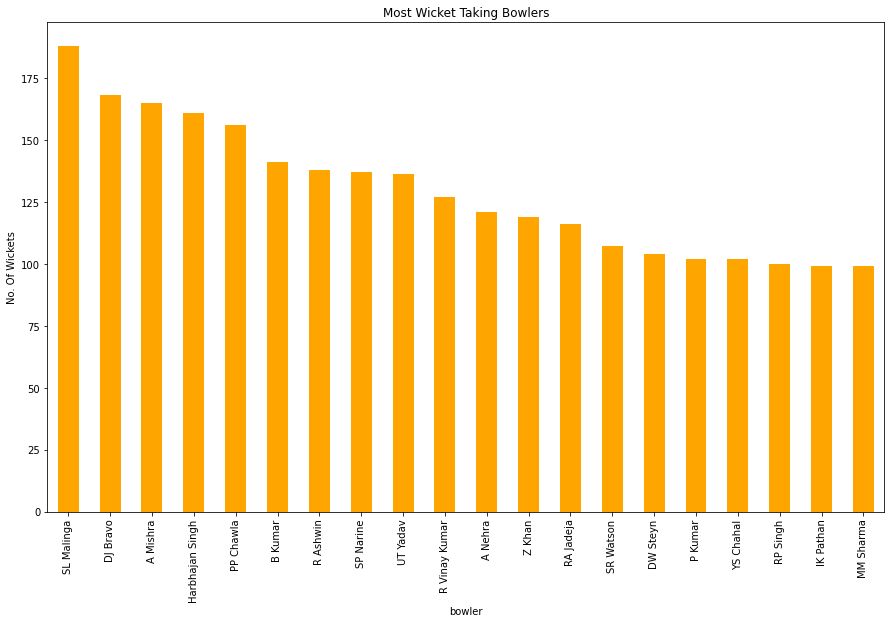

In [31]:
plt.figure(figsize=[15,9])
plt.title('Most Wicket Taking Bowlers')
plt.ylabel('No. Of Wickets')
deliveres.groupby('bowler').player_dismissed.count().sort_values(ascending=False)[:20].plot(kind='bar', color='orange')

# Most Runs Scored by Batsman In All Season

<AxesSubplot:title={'center':'Most Runs Scored'}, xlabel='batsman', ylabel='No. Of Runs'>

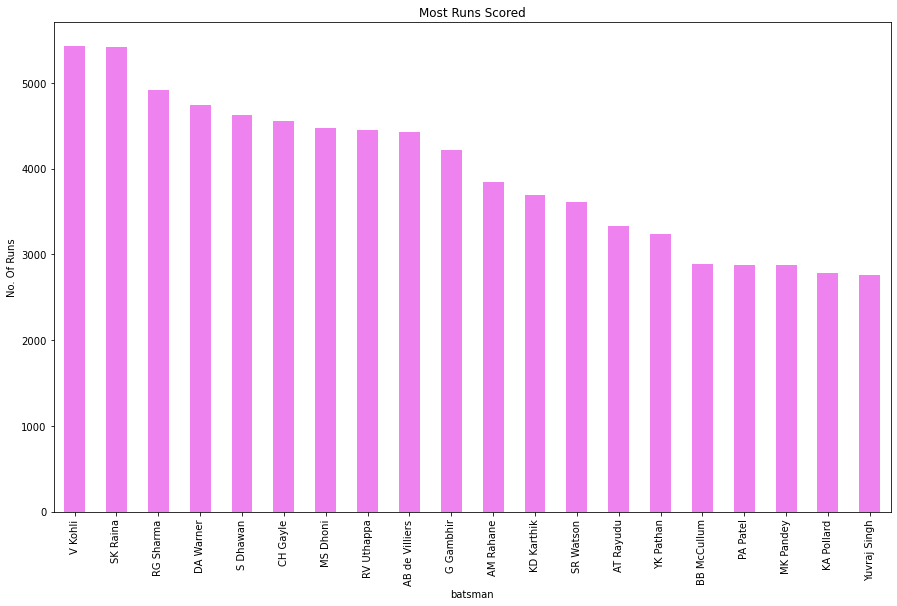

In [32]:
plt.figure(figsize=[15,9])
plt.title('Most Runs Scored')
plt.ylabel('No. Of Runs')
deliveres.groupby('batsman').batsman_runs.sum().sort_values(ascending=False)[:20].plot(kind='bar', color='violet')

# Top Scores By A Batsman

In [33]:
top_scores= deliveres.groupby(["match_id","batsman","batting_team","bowling_team"])["batsman_runs"].sum().reset_index()
top_scores.sort_values("batsman_runs", ascending=False)[:10]

,match_id,batsman,batting_team,bowling_team,batsman_runs
6200,411,CH Gayle,Royal Challengers Bangalore,Pune Warriors,175
900,60,BB McCullum,Kolkata Knight Riders,Royal Challengers Bangalore,158
8426,562,AB de Villiers,Royal Challengers Bangalore,Mumbai Indians,133
10149,7935,RR Pant,Delhi Daredevils,Sunrisers Hyderabad,130
9257,620,AB de Villiers,Royal Challengers Bangalore,Gujarat Lions,129
5585,372,CH Gayle,Royal Challengers Bangalore,Delhi Daredevils,128
3135,206,M Vijay,Chennai Super Kings,Rajasthan Royals,127
529,36,DA Warner,Sunrisers Hyderabad,Kolkata Knight Riders,126
7752,516,V Sehwag,Kings XI Punjab,Chennai Super Kings,122
10417,7953,SR Watson,Chennai Super Kings,Sunrisers Hyderabad,121


# Player Of the Match Won

<AxesSubplot:title={'center':'Player Of the Match'}>

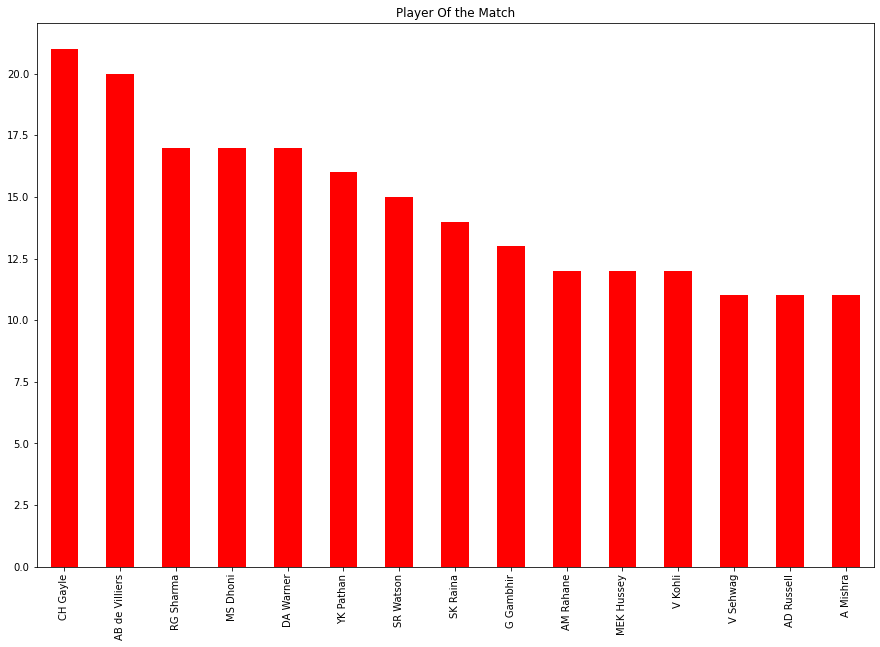

In [34]:
plt.figure(figsize=[15,10])
plt.title('Player Of the Match')
matches.player_of_match.value_counts()[:15].plot(kind='bar', color='red')

# Player Of The Match Among All Seasons

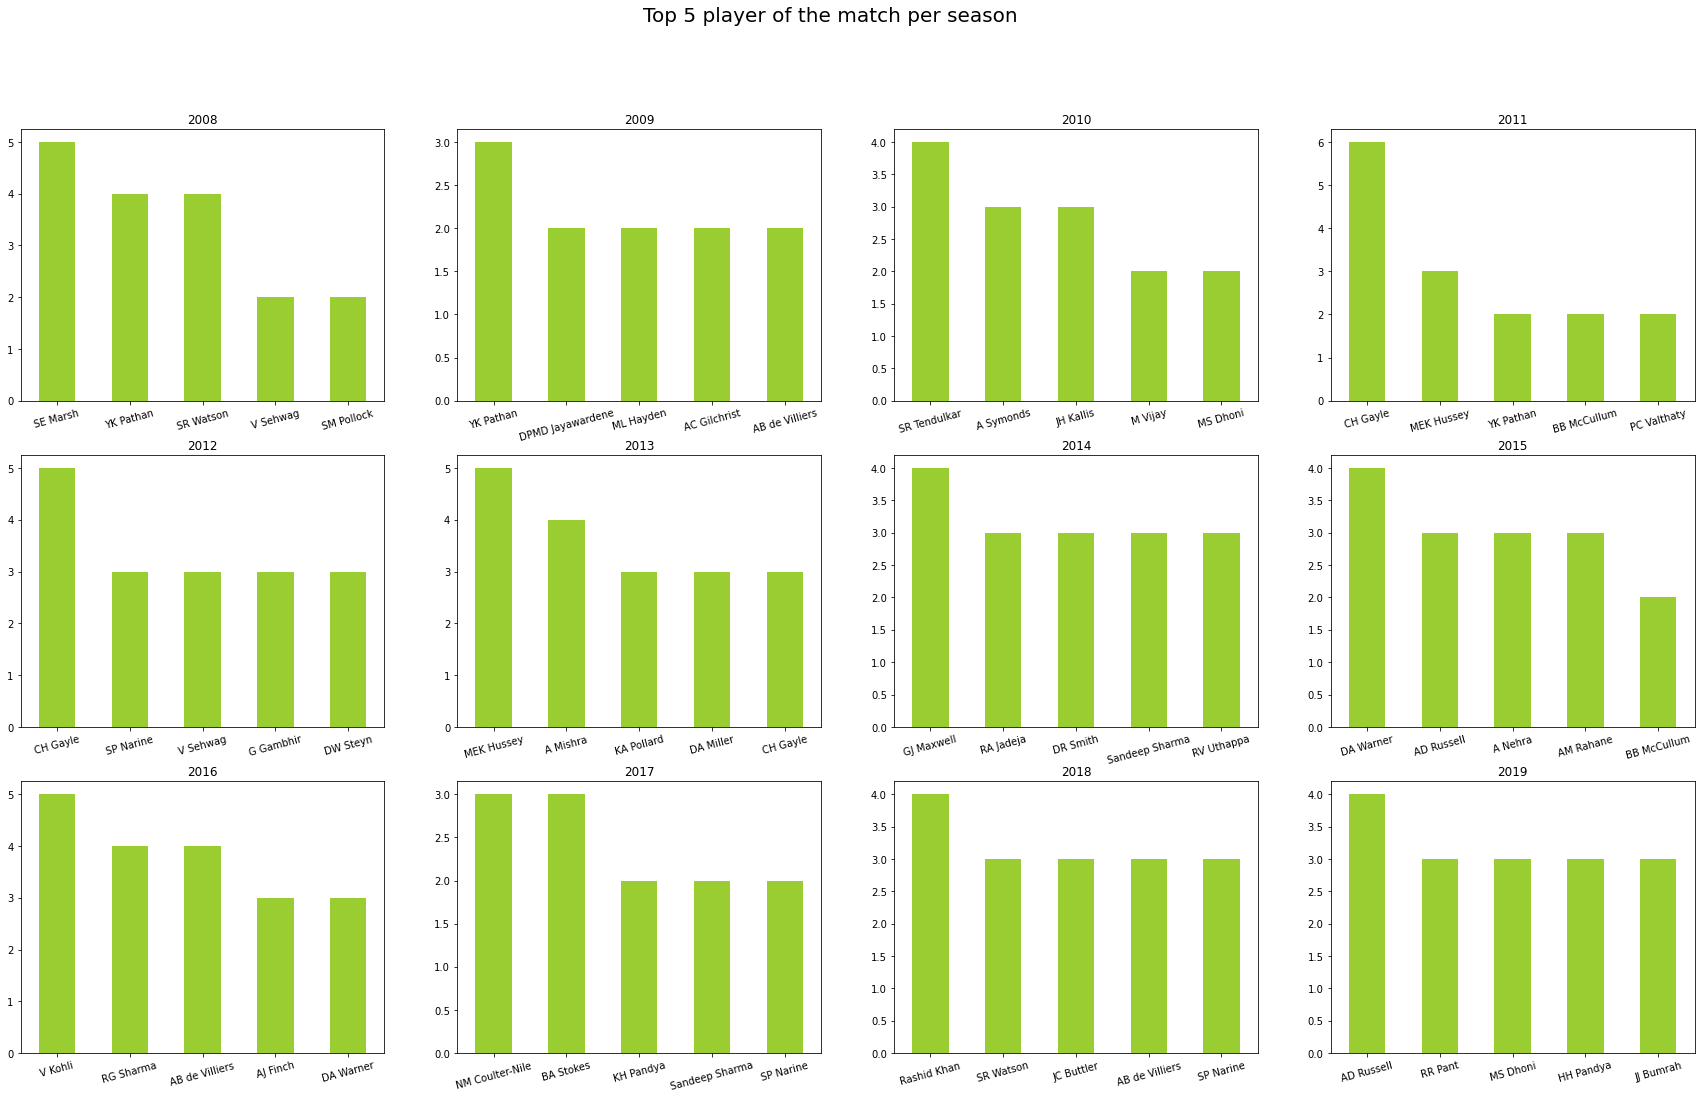

In [35]:
plt.figure(figsize=[30,17])
plt.suptitle("Top 5 player of the match per season", fontsize=20)
season1 = 2008
for i in range(1,13):
    plt.subplot(3,4,i)
    plt.title(season1)
    matches[matches.season == season1].player_of_match.value_counts()[:5].plot(kind='bar', color='yellowgreen')
    plt.xticks(rotation =15)
    season1 += 1
plt.show()

# Most Number Of Fours Hit By A Single Batsman 

<AxesSubplot:title={'center':'Numbers Of fours Hit'}, xlabel='batsman,total_runs'>

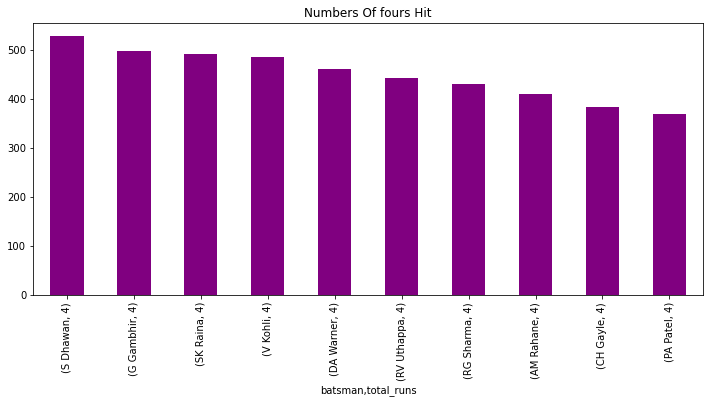

In [36]:
plt.figure(figsize=[12,5])
plt.title('Numbers Of fours Hit')
fours = deliveres[deliveres.total_runs == 4].groupby('batsman')
fours.total_runs.value_counts().sort_values(ascending=False)[:10].plot(kind="bar", color="purple")

# Most Number Of Six Hits By A Single Batsman

<AxesSubplot:title={'center':'Numbers Of Sixes Hit'}, xlabel='batsman,total_runs'>

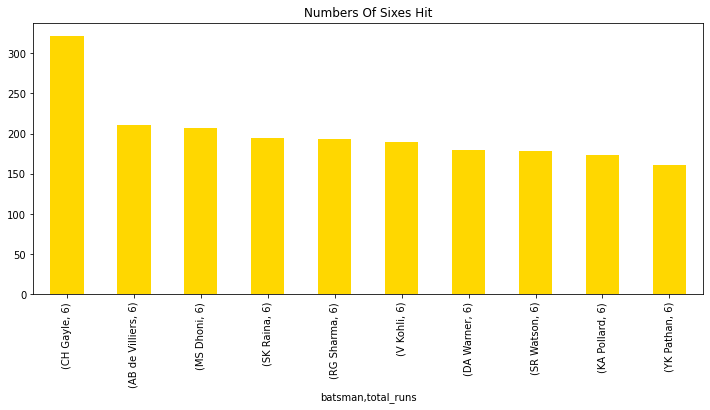

In [37]:
plt.figure(figsize=[12,5])
plt.title('Numbers Of Sixes Hit')
sixes = deliveres[deliveres.total_runs == 6].groupby('batsman')
sixes.total_runs.value_counts().sort_values(ascending=False)[:10].plot(kind="bar", color="gold")

# 3) Analysis On IPL Matches

### Impact Of Toss On Win & Loss

<BarContainer object of 2 artists>

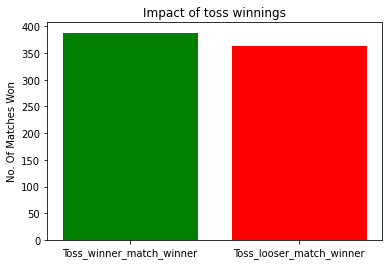

In [38]:
plt.title('Impact of toss winnings')
plt.ylabel('No. Of Matches Won')
result = ['Toss_winner_match_winner', 'Toss_looser_match_winner']
count = [matches[matches.toss_winner == matches.winner].winner.count(), matches[matches.toss_winner != matches.winner].winner.count()]
plt.bar(result, count, color=['green','red'])

# Decision Of Batting & Fielding After the toss won by Captain

<BarContainer object of 2 artists>

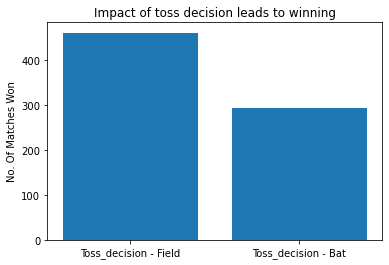

In [39]:
plt.title('Impact of toss decision leads to winning')
plt.ylabel('No. Of Matches Won')
result1 = ['Toss_decision - Field', 'Toss_decision - Bat']
count1 = [matches[matches.toss_decision == 'field'].winner.count(), matches[matches.toss_decision == 'bat'].winner.count()]
plt.bar(result1, count1)

# Most Number Of Matches Hosted In Cities

<AxesSubplot:title={'center':'Match hosting Cities'}, ylabel='No. Of Matches'>

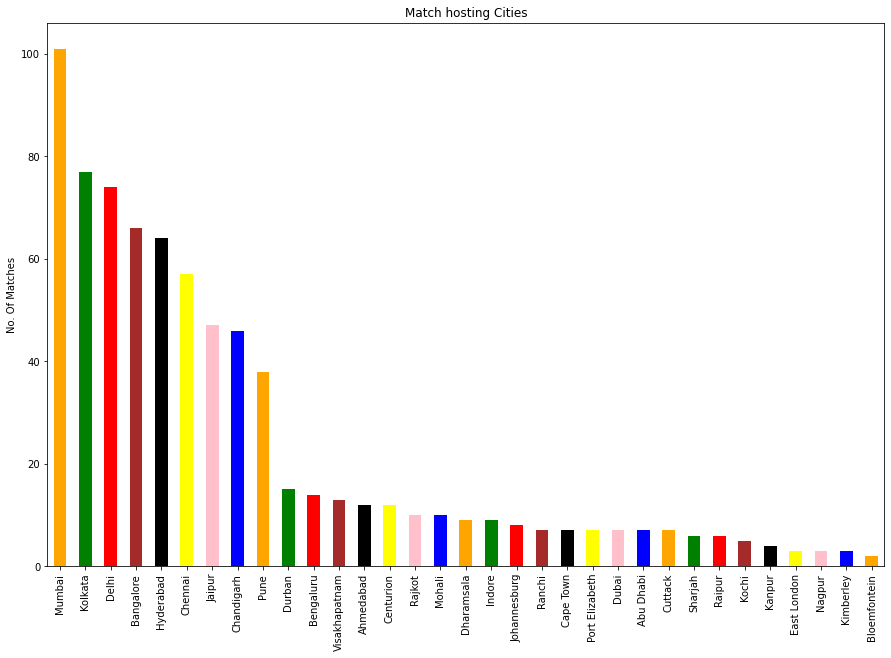

In [40]:
plt.figure(figsize=[15,10])
plt.title('Match hosting Cities')
plt.ylabel('No. Of Matches')
matches.city.value_counts().plot(kind='bar', color=['orange','green','red','brown','black','yellow','pink','blue'])

<AxesSubplot:title={'center':'Match hosting Venues'}, ylabel='No. Of Matches'>

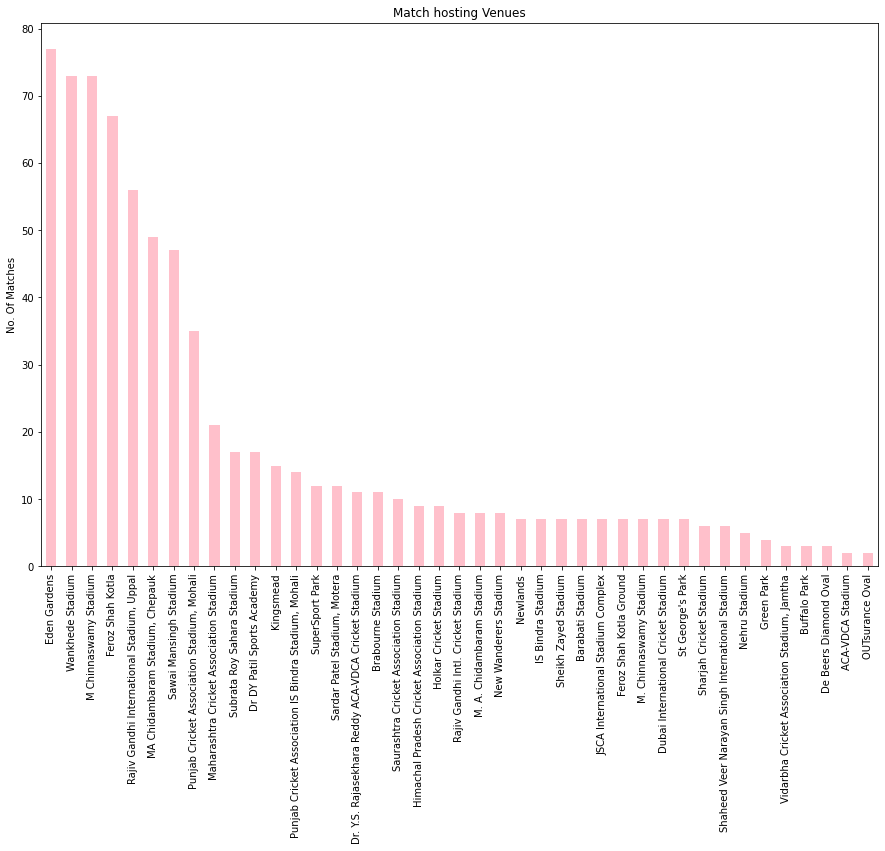

In [41]:
plt.figure(figsize=[15,10])
plt.title('Match hosting Venues')
plt.ylabel('No. Of Matches')
matches.venue.value_counts().plot(kind='bar', color='pink')

# Conclusion:-

#### These are the top 3 teams are the most succesfull teams, that an advertisement company should endorse for it's products:-

1) Mumbai Indians
2) Chennai Super Kings
3) Kolkata Knight Riders


#### These are the top 4 players are the most succesfull players, that an advertisement company should endorse for it's products:-

1) Virat Kohli
2) Chris Gayle
3) Sk Raina
4) RG Sharma

#### Factors of loosing or win the teams:-

1) The teams who won the toss slightly have a higher chance to win.
2) The teams who field first has more chance of capturing that game.

#### Milestone's By some Batsman for high scores:-

1) Virat Kohli
2) Chris Gayle
3) Sk Raina
